In [22]:
import random
random.seed(42)
num_operations = 5
for op in range(1, num_operations + 1):
    print(f'Operation:{op}')
    successor = max(op + 1 , min(num_operations, int(random.gauss(num_operations, num_operations * 0.1))) ) if op < num_operations else -1
    print(f'Sucessor:{successor}')

Operation:1
Sucessor:4
Operation:2
Sucessor:4
Operation:3
Sucessor:4
Operation:4
Sucessor:5
Operation:5
Sucessor:-1


In [23]:
amount_products = 10
weights = []
for i in range(amount_products):
    # Generate weights with higher values in the middle
    position_factor = abs((amount_products // 2) - i) + 1
    weight = random.gauss(1 / position_factor, 0.2 / position_factor)
    while weight < 0:  # Regenerate if the weight is negative
        weight = random.gauss(1 / position_factor, 0.2 / position_factor)
    weights.append(weight)
total_weight = sum(weights)
sum_products = 0
product_types_relation = {f'p{i}': weight / total_weight for i, weight in enumerate(weights, 1)}
for p in product_types_relation.items():
    print(f'Product types relation: {p}')
    sum_products = sum_products + p[1]
    
print(f'Sum of products: {sum_products}')

Product types relation: ('p1', 0.042656115475117946)
Product types relation: ('p2', 0.036797209906325276)
Product types relation: ('p3', 0.07002363519822885)
Product types relation: ('p4', 0.08286532862158157)
Product types relation: ('p5', 0.1256211346091456)
Product types relation: ('p6', 0.26872577884900584)
Product types relation: ('p7', 0.1374203430240743)
Product types relation: ('p8', 0.10791923441041328)
Product types relation: ('p9', 0.07428255885017046)
Product types relation: ('p10', 0.05368866105593679)
Sum of products: 1.0


In [24]:
weights

[0.16241372387390376,
 0.14010586342636172,
 0.2666159172033858,
 0.31551083476685543,
 0.4783041315854805,
 1.023176957340171,
 0.5232297736906721,
 0.41090391243994284,
 0.28283182533993345,
 0.20442028709775328]

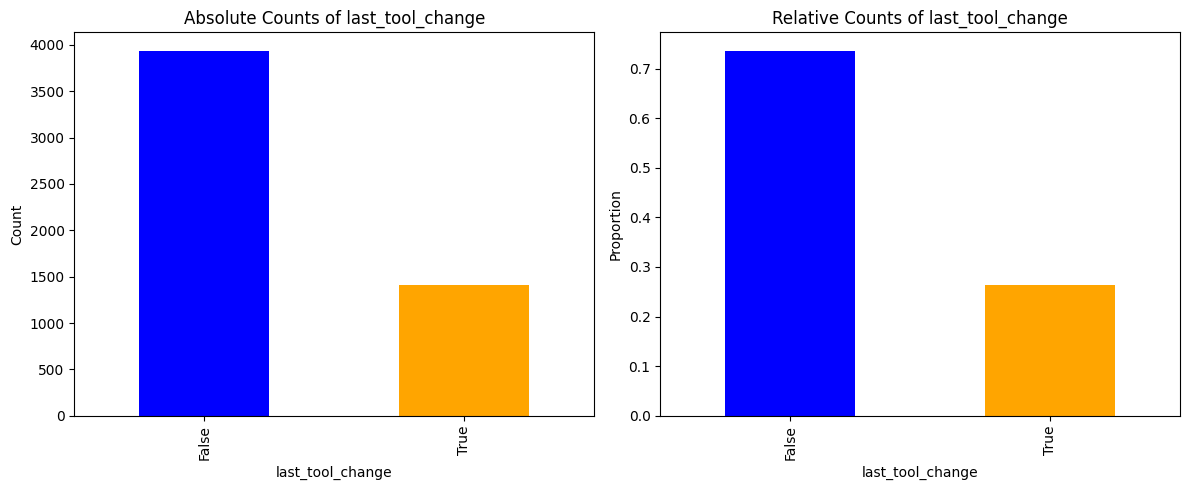

In [25]:
import pandas as pd
from io import StringIO

import matplotlib.pyplot as plt


df = pd.read_csv("./data/data_observe.csv", sep=",")

# Calculate absolute counts
absolute_counts = df['last_tool_change'].value_counts()

# Calculate relative counts
relative_counts = df['last_tool_change'].value_counts(normalize=True)

# Plot histograms
fig, axes = plt.subplots(1, 2, figsize=(12, 5))

# Absolute counts histogram
absolute_counts.plot(kind='bar', ax=axes[0], color=['blue', 'orange'])
axes[0].set_title('Absolute Counts of last_tool_change')
axes[0].set_xlabel('last_tool_change')
axes[0].set_ylabel('Count')

# Relative counts histogram
relative_counts.plot(kind='bar', ax=axes[1], color=['blue', 'orange'])
axes[1].set_title('Relative Counts of last_tool_change')
axes[1].set_xlabel('last_tool_change')
axes[1].set_ylabel('Proportion')

plt.tight_layout()
plt.show()

In [ ]:
import numpy as np
import pandas as pd
# Initialize distributions dictionary
distributions = {}

# Define mean and variance for each combination of 'machine_state' and 'cleaning'
combinations = [
    ((0, 0), {'mean': 1.0, 'variance': 0.01}),
    ((0, 1), {'mean': 1.0, 'variance': 0.015}),
    ((1, 0), {'mean': 1.0, 'variance': 0.02}),
    ((1, 1), {'mean': 1.0, 'variance': 0.025}),
]

# Populate the distributions dictionary
for (machine_state, cleaning), stats in combinations:
    distributions[('relative_processing_time_deviation', tuple({'machine_state': machine_state, 'cleaning': cleaning}.items()))] = stats

# Create parent_values using machine_state and cleaning variables
parent_values = (('machine_state', 1), ('cleaning', 1))
# Check if the parent combination exists in the learned distributions
key = ('relative_processing_time_deviation', parent_values)
if key in distributions:
    params = distributions[key]
    mean = params['mean']
    variance = params['variance']
    std_dev = np.sqrt(variance)
    
    # Sample from the Gaussian distribution
    relative_processing_time_deviation = np.random.normal(mean, std_dev)
else:
    print(f"No distribution found for parent values: {parent_values}. Using default mean and variance.")

# Create a pandas DataFrame from the sampled data
df = pd.DataFrame({'relative_processing_time_deviation': [np.random.normal(mean, std_dev) for _ in range(1000000)]})

print(df.head(15))
# Display the descriptive statistics of the DataFrame
print(df.describe())


    relative_processing_time_deviation
0                             1.203448
1                             0.999202
2                             0.854729
3                             1.081583
4                             1.024285
5                             1.083059
6                             1.106520
7                             1.015969
8                             1.040566
9                             1.061015
10                            0.855230
11                            0.992925
12                            1.162611
13                            1.295623
14                            1.240661
       relative_processing_time_deviation
count                      1000000.000000
mean                             1.000046
std                              0.158008
min                              0.300203
25%                              0.893336
50%                              0.999976
75%                              1.106443
max                              1.72149

In [159]:
import modules.metrics as metrics

# Calculate Levenshtein distance and NDCG
# between two lists of names
# Example lists
A = ["Person1", "Person2", "Person3", "Person4", "Person5"]

# Case 1: Only one is swapped
B1 = ["Person1", "Person3", "Person2", "Person4", "Person5"]
print("Case 1 - One swapped:")
print(f'Levenshtein: {metrics.list_distance(A, B1)}')
print(f'NDCG: {metrics.calculate_ndcg(A, B1)}')

# Case 2: One is missing in the second list
B2 = ["Person1", "Person2", "Person4", "Person5"]
print("\nCase 2 - One missing:")
print(f'Levenshtein: {metrics.list_distance(A, B2)}')
print(f'NDCG: {metrics.calculate_ndcg(A, B2)}')

# Case 3: All are the same
B3 = ["Person1", "Person2", "Person3", "Person4", "Person5"]
print("\nCase 3 - All the same:")
print(f'Levenshtein: {metrics.list_distance(A, B3)}')
print(f'NDCG: {metrics.calculate_ndcg(A, B3)}')

# Case 4: Nothing is the same
B4 = ["Person6", "Person7", "Person8", "Person9", "Person10"]
print("\nCase 4 - Nothing the same:")
print(f'Levenshtein: {metrics.list_distance(A, B4)}')
print(f'NDCG: {metrics.calculate_ndcg(A, B4)}')


B5 = ["Person2", "Person1", "Person4", "Person5", "Person3"]
print("\nCase 5 - Same rank but different order:")
print(f'Levenshtein: {metrics.list_distance(A, B5)}')
print(f'NDCG: {metrics.calculate_ndcg(A, B5)}')



Case 1 - One swapped:
Levenshtein: 2
NDCG: 0.9808429118773945

Case 2 - One missing:
Levenshtein: 1
NDCG: 0.9099616858237549

Case 3 - All the same:
Levenshtein: 0
NDCG: 1.0

Case 4 - Nothing the same:
Levenshtein: 5
NDCG: 0.0

Case 5 - Same rank but different order:
Levenshtein: 3
NDCG: 0.9214559386973182
